# Mapeando el Universo



## Análisis y Visualización

 En este primer trabajo comenzaremos a explorar los datos, para ello se propone responder las siguientes consignas:
 
**1 - Análisis general**
 
 * Describir el conjunto de datos, indicando cantidad de variables, qué representa cada una, tipo, etc.
 * Considerando el objetivo pricipal de la mentoría, cuáles creen que serían las variables más importantes a considerar?
 
**2 - Análisis estadístico**
 
 * Es la distribución de galaxia uniforme sobre la bóveda celeste?
 * Considerando una "rebanada" sobre el plano celeste, grafiquen la distribución de galaxias considerando el corrimiento al rojo como la distancia.
 * Cómo son las distribuciones de las magnitudes de las galaxias en las diferentes bandas?
 * Cuál es la distribución del corrimiento al rojo de las galaxias?
 * Existe correlación entre las diferentes variables?
 * Realicen gráficos boxplot para identificar outliers.
 * Utilizando las magnitudes es posible construir índices colores, por ejemplo u-g o g-r. Analicen la distribución de algunos de estos índices. Se observa algo en particular?
 * Analice si exite alguna relación entre algún índice de color y el tipo morfológico. Pueden ajustar las distribuciones de color para cada tipo morfológico con una función normal y ver si encuentran diferencias.
 * Mostrar si los valores de las medianas de las distribuciones de z para cada clase (E,S e I) son estadśticamente diferentes.

### Lectura de datos

Esto es una manera, pueden utilizar las que más les convenga

In [66]:
import warnings
warnings.filterwarnings('ignore')

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
filename = "dataset/dataset_short.csv"

In [69]:
df = pd.read_csv(filename,index_col=0)

In [70]:
df.index.max()

3341830154740590592

In [71]:
df.shape

(5000, 115)

In [72]:
df.describe()

,z,zErr,zWarning,velDisp,velDispErr,ra,dec,raErr,decErr,modelMag_u,...,expPhi_u,expPhi_g,expPhi_r,expPhi_i,expPhi_z,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.106732,0.000021,0.016000,136.691611,14.852510,184.204791,25.125391,0.016671,0.016180,19.539480,...,88.794310,87.360266,88.887199,89.332310,88.817731,0.132420,0.103181,0.071380,0.053043,0.039454
std,0.054623,0.000013,0.466248,75.595506,19.427326,57.759337,18.694276,0.041910,0.033692,1.076405,...,57.854492,56.442004,56.147341,55.664620,54.975755,0.086213,0.067177,0.046472,0.034534,0.025687
min,0.010423,0.000003,0.000000,0.000000,-3.000000,0.001718,-11.179560,0.001259,0.001218,15.335180,...,-83.074030,-90.508710,-90.101060,-84.125630,-82.517460,0.022077,0.017202,0.011901,0.008843,0.006578
25%,0.066716,0.000011,0.000000,84.571003,9.171935,150.622355,10.275177,0.005682,0.005586,18.939248,...,43.378330,44.293123,46.491595,47.244455,48.280400,0.075577,0.058889,0.040739,0.030274,0.022518
50%,0.100656,0.000019,0.000000,131.921400,12.240650,184.413855,23.384139,0.008408,0.008254,19.595610,...,88.246740,86.045460,89.176195,89.443595,89.212245,0.111950,0.087231,0.060346,0.044843,0.033355
75%,0.138991,0.000028,0.000000,182.166950,16.379272,219.592476,39.191761,0.015174,0.015143,20.245438,...,134.898150,130.424700,131.439100,131.357875,129.700900,0.165019,0.128582,0.088952,0.066101,0.049167
max,0.746932,0.000305,16.000000,850.000000,1131.371000,359.995051,69.241324,1.817576,0.789803,28.112870,...,249.604300,240.368900,255.055200,249.604200,249.604200,1.098986,0.856323,0.592400,0.440217,0.327440


### Uniendo dataframes

Vamos a ir un poco más allá y vamos a unir la tabla anterior con otra donde para algunas de las galaxias la gente a votado si se corresponde con una galaxia espiral, eliptica o irregular.

In [73]:
filename = 'dataset/dataset_short_zoo.csv'

In [74]:
zoo = pd.read_csv(filename,index_col=0)

In [75]:
zoo.describe

<bound method NDFrame.describe of                      spiral  elliptical  uncertain
specobjid                                         
2102060129527556096       0           0          1
2006529611202062336       0           0          1
2489490101873174528       1           0          0
453783048702420992        0           0          1
2665066165524523008       0           0          1
...                     ...         ...        ...
644134631884482560        1           0          0
2788960240203229184       0           1          0
2734962120306223104       0           0          1
833194281454823424        0           0          1
2070606952731273216       0           0          1

[5000 rows x 3 columns]>

In [76]:
dd = df.join(zoo)

In [77]:
dd.describe()

,z,zErr,zWarning,velDisp,velDispErr,ra,dec,raErr,decErr,modelMag_u,...,expPhi_i,expPhi_z,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z,spiral,elliptical,uncertain
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,0.106732,0.000021,0.016000,136.691611,14.852510,184.204791,25.125391,0.016671,0.016180,19.539480,...,89.332310,88.817731,0.132420,0.103181,0.071380,0.053043,0.039454,0.28880,0.099800,0.611400
std,0.054623,0.000013,0.466248,75.595506,19.427326,57.759337,18.694276,0.041910,0.033692,1.076405,...,55.664620,54.975755,0.086213,0.067177,0.046472,0.034534,0.025687,0.45325,0.299763,0.487481
min,0.010423,0.000003,0.000000,0.000000,-3.000000,0.001718,-11.179560,0.001259,0.001218,15.335180,...,-84.125630,-82.517460,0.022077,0.017202,0.011901,0.008843,0.006578,0.00000,0.000000,0.000000
25%,0.066716,0.000011,0.000000,84.571003,9.171935,150.622355,10.275177,0.005682,0.005586,18.939248,...,47.244455,48.280400,0.075577,0.058889,0.040739,0.030274,0.022518,0.00000,0.000000,0.000000
50%,0.100656,0.000019,0.000000,131.921400,12.240650,184.413855,23.384139,0.008408,0.008254,19.595610,...,89.443595,89.212245,0.111950,0.087231,0.060346,0.044843,0.033355,0.00000,0.000000,1.000000
75%,0.138991,0.000028,0.000000,182.166950,16.379272,219.592476,39.191761,0.015174,0.015143,20.245438,...,131.357875,129.700900,0.165019,0.128582,0.088952,0.066101,0.049167,1.00000,0.000000,1.000000
max,0.746932,0.000305,16.000000,850.000000,1131.371000,359.995051,69.241324,1.817576,0.789803,28.112870,...,249.604200,249.604200,1.098986,0.856323,0.592400,0.440217,0.327440,1.00000,1.000000,1.000000


# **Resolución Punto 1 - Análisis general**
 
 * Descripción del conjunto de datos (cantidad de variables, qué representa cada una, tipo, etc.)
 * ¿cuáles creen que serían las variables más importantes a considerar?

In [78]:
dd.shape

(5000, 118)

In [79]:
np.asarray([list(dd.columns)])

array([['z', 'zErr', 'zWarning', 'subClass', 'velDisp', 'velDispErr',
        'ra', 'dec', 'raErr', 'decErr', 'modelMag_u', 'modelMag_g',
        'modelMag_r', 'modelMag_i', 'modelMag_z', 'modelMagErr_u',
        'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
        'modelMagErr_z', 'petroMag_u', 'petroMag_g', 'petroMag_r',
        'petroMag_i', 'petroMag_z', 'petroMagErr_u', 'petroMagErr_g',
        'petroMagErr_r', 'petroMagErr_i', 'petroMagErr_z', 'petroRad_u',
        'petroRad_g', 'petroRad_r', 'petroRad_i', 'petroRad_z',
        'petroRadErr_u', 'petroRadErr_g', 'petroRadErr_r',
        'petroRadErr_i', 'petroRadErr_z', 'petroR50_u', 'petroR50_g',
        'petroR50_r', 'petroR50_i', 'petroR50_z', 'petroR50Err_u',
        'petroR50Err_g', 'petroR50Err_r', 'petroR50Err_i',
        'petroR50Err_z', 'petroR90_u', 'petroR90_g', 'petroR90_r',
        'petroR90_i', 'petroR90_z', 'petroR90Err_u', 'petroR90Err_g',
        'petroR90Err_r', 'petroR90Err_i', 'petroR90Err_z', 'deVRad_u',

Las columnas 'z' y 'zErr', se corresponden al redshift y su error

La columna zWarning son flags (enteros) que indican si hubieron problemas en el proceso de ajuste para la obtencion del redshift.
Con el valor 0 y 16 se indica que no hubo problemas.

La columna subClass indica con 'strings' una sub-clasificacion de las galaxias y qso a partir de la informacion en las lineas de emision de sus espectros. Los valores posibles son: 'AGN', 'STARFORMING', 'STARBURST', 'BROADLINE' or NaN. 

La columna velDisp y velDispErr es la velocidad de disperción (km/s) de las galaxias y su error. 
Los valores posibles son floats positivos. 

Las columnas ra, dec, raErr y decErr son las coordenadas ecuatoriales en el sistema J2000 en grados decimales y sus errores.

A partir de la columna 10 hasta la columna 108 se tiene información sobre las magnitudes en las diferentes bandas 
fotométricas y distintos parámetros utilizados para cálculo de las mismas.
Tenemos las magnitudes 'ModelMag' para las 5 bandas fotometricas (u, g, r, i, z). Estas magnitudes, se corresponden
con el modelo (Vaucouleurs,exponencial) que mejor ajusta el flujo de la galaxia en la banda r. Este mismo modelo y parametros es utilizado para obtener las megnitudes en el resto de las bandas fotometricas. Esto permite que los colores no esten sesgados.
Tambien tenemos las magnitudes petrosianas 'petroMag_' que se corresponden con ...

Las restantes columnas se corresponden con los paramentros utilizados para los distintos modelos (Vaucouleurs, Exponencial),
ejemplo: rdeV and rExp: radio efectivo para los distintos modelos, abDeV y abExp: relación de ejes para 
el modelo con mejor ajuste, phiDeV and phiExp, etc 
Para las magnitudes petrosianas tenemos las columnas por ejemplo, petroRad que se corresponde al radio petrosiano 
utilizado para obtener las magnitudes petroMag.


Las columnas 'extinction_' se corresponden a las correcciones en magnitud por extinción galactica para las 5 bandas fotometricas. El mapa de extinción utilizado es el de Schlegel et al. 1998.

Las columnas 'spiral', 'elliptical' y 'uncertain' se corresponden a la clasificacion de galaxias obtenidas a partir del relevamiento Zoo. Los valores posibles son 0 y 1 (False=0, True=1).

La columna intervals ..? y z_segment se corresponde con intervalos en redshift de ..?

In [80]:
dd.dtypes


z               float64
zErr            float64
zWarning          int64
subClass         object
velDisp         float64
                 ...   
extinction_i    float64
extinction_z    float64
spiral            int64
elliptical        int64
uncertain         int64
Length: 118, dtype: object

**NOTA**    
**a)** Contamos con 117 variables iniciales    
**b)** Las variables son de tipo numéricas (float64, int64) excepto la varibale *subclass* que es de tipo objet.    
**c)** Las variables más importantes a considerar en este estudio serían las que nos brinden información del Brillo de las galaxias en las diferentes bandas del espectro electromagnético, para poder estimar a partir de ellas la distancia de las mismas.   
**d)** El brillo se mide en 5 bandas (u, g, r, i, z) y se puede calcular mediante 3 métodos diferentes:    
          *petroMag* (Petrosian magnitudes),      
          *expMag* (Exponential fit) y    
          *deVMag* (de Vaucouleurs fit)

# **Resolución 2 - Análisis estadístico**
 
 * Distribución de las galaxias  sobre la bóveda celeste

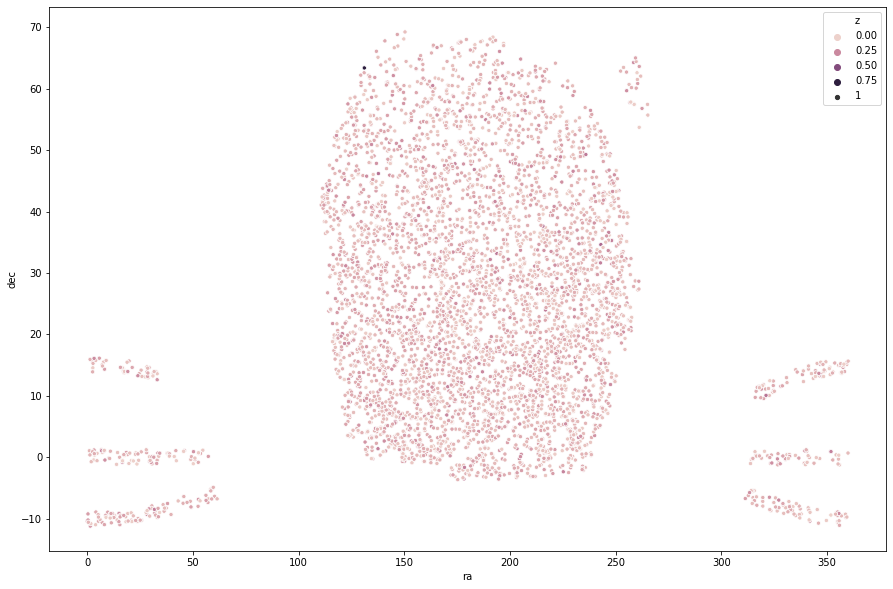

In [81]:
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(111)

sns.scatterplot(x='ra',y='dec',data=df,hue='z',size=1,ax=ax)

**NOTA**     
**a)** En este gráfico podemos observar la distribución en el cielo de las galaxias, y podemos apreciar si están distribuidas de forma uniforme respecto de las distancias o no.    

eje Y= Declinación medida en grados   
eje x= asención medida en grados   
z= distancia (redshift)   


## * Considerando una "rebanada" sobre el plano celeste, grafiquen la distribución de galaxias considerando el corrimiento al rojo como la distancia.

In [82]:
slice_dec = [30,40]
dataset_cut = dd
dataset_cut['intervals'] = pd.cut(dd['dec'],slice_dec)
dataset_sliced = dataset_cut[dataset_cut['intervals'] == pd.Interval(slice_dec[0],slice_dec[1])]

### Lo mismo pero con la rebanada

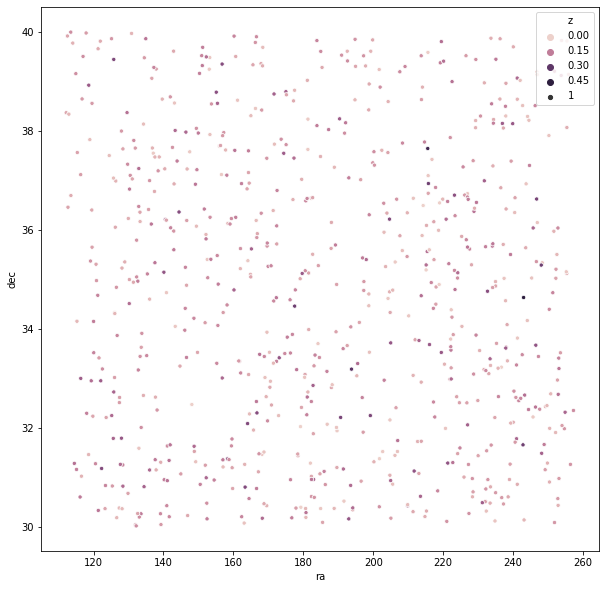

In [83]:
f = plt.figure(figsize=(10,10))
ax = f.add_subplot(111)
sns.scatterplot(x='ra',y='dec',data=dataset_sliced,hue='z',size=1,ax=ax)

### Distribución de galxias en z de la rebanada

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

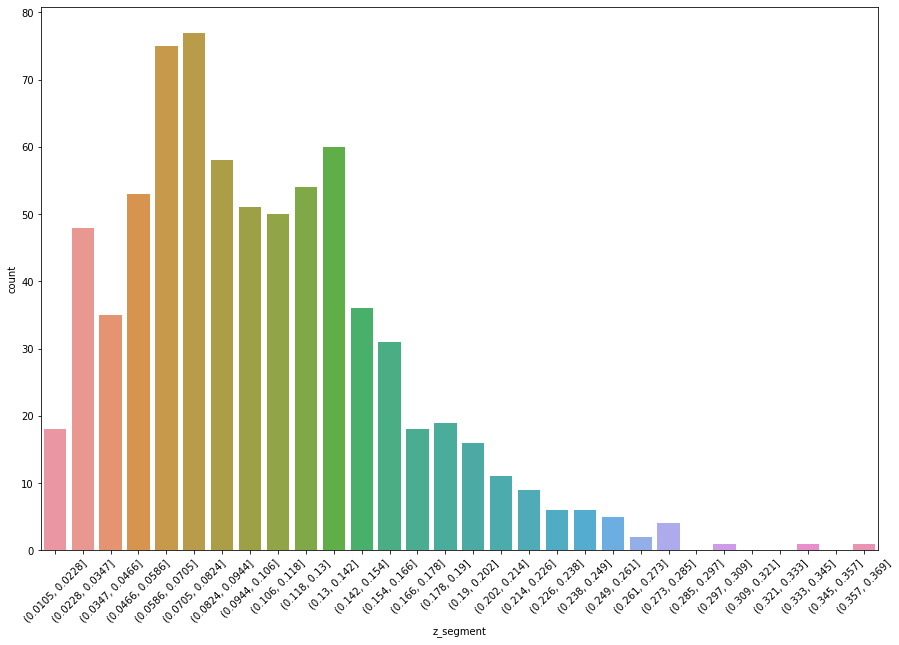

In [84]:
dataset_sliced['z_segment'] = pd.cut(dataset_sliced['z'],30)
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(111)
sns.countplot(data=dataset_sliced, x='z_segment')
plt.xticks(rotation=45)

### Distribución de galaxias en la rebanada según ra

In [85]:
dataset_sliced['ra_segment'] = pd.cut(dataset_sliced['ra'],range(0,360,6))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58]),
 <a list of 59 Text xticklabel objects>)

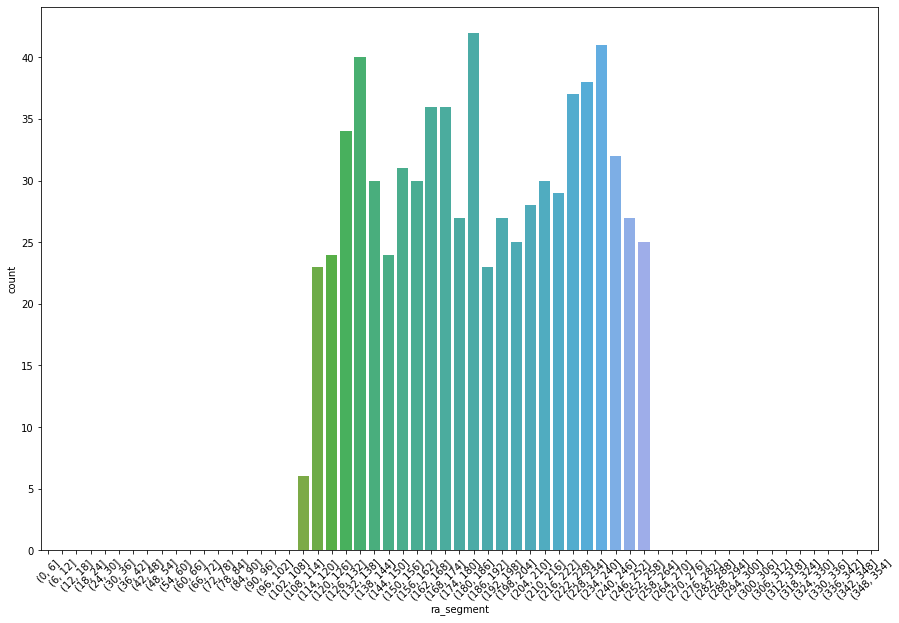

In [86]:
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(111)
sns.countplot(data=dataset_sliced, x='ra_segment')
plt.xticks(rotation=45)

 ## * Cómo son las distribuciones de las magnitudes de las galaxias en las diferentes bandas?

 ## * Cuál es la distribución del corrimiento al rojo de las galaxias?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

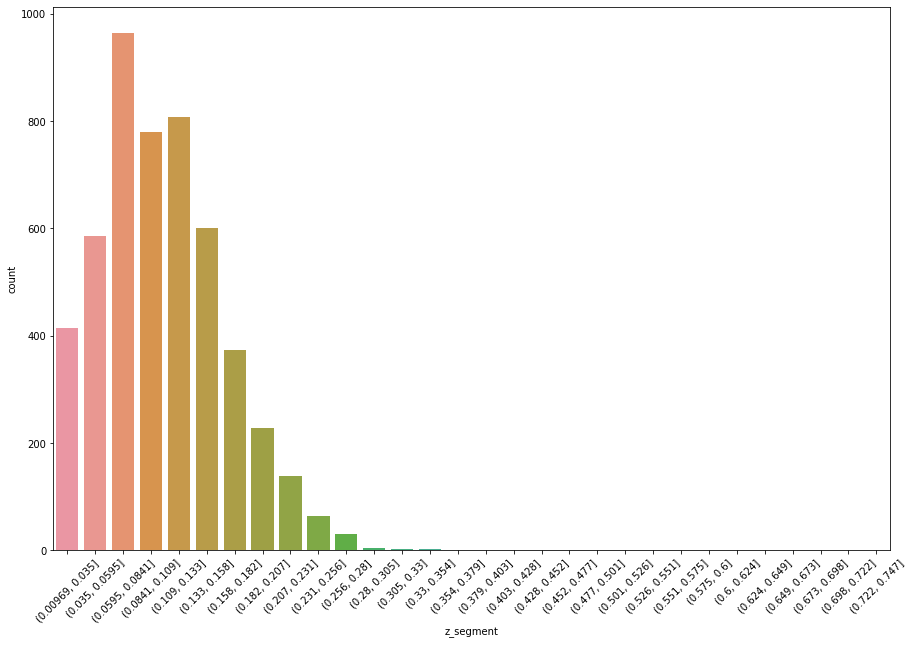

In [87]:
dd['z_segment'] = pd.cut(dd['z'],30)
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(111)
sns.countplot(data=dd, x='z_segment')
plt.xticks(rotation=45)

 ## * Existe correlación entre las diferentes variables?

 ## * Realicen gráficos boxplot para identificar outliers.

## * Utilizando las magnitudes es posible construir índices colores, por ejemplo u-g o g-r. Analicen la distribución de algunos de estos índices. Se observa algo en particular?

In [88]:
# scatterplor magnitud-color

## * Analice si exite alguna relación entre algún índice de color y el tipo morfológico. Pueden ajustar las distribuciones de color para cada tipo morfológico con una función normal y ver si encuentran diferencias.

 ## * Mostrar si los valores de las medianas de las distribuciones de z para cada clase (E,S e I) son estadśticamente diferentes.